Limpieza de Datos

In [2]:
import pandas as pd
import numpy as np
import re
#from google.colab import drive
#drive.mount('/content/drive')

Load the data set of recordings.

In [3]:
#Enable one one these lines to run since GoogleDrive 
#Since Samuel Drive
#data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data_Mining_Course/Project_1/CPT_PREDICTIVE_PPM.csv", encoding='cp1252')
#Since Joseph Drive
#data=pd.read_csv("/content/drive/MyDrive/Project_1/CPT_PREDICTIVE_PPM.csv", encoding='cp1252')
data=pd.read_csv("/work/CPT_PREDICTIVE_PPM.csv")
data.head

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (9,12,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Work Order Number,Site Number,Site Type,Date Created,Date Completed,Provider Name,WO Current Status,Asset Category,Problem Type Name,Requested By,WO Priority,Manufacturer,Asset In-Service Date,Level 1 Organization Name,Site Zipcode,Sales Sq. Ft.,Asset Barcode,Client Product Name,Asset Type,Asset Status
0,12904684,A0892,SUPERMARKET,01/02/2012 03:05,01/02/2012 10:00,Space Engineering services LTD,EOL,REFRIGERATION,Fixture Critical Over Temperature Alarm,Urgent Refrigeration Alarm,Standard SLA,CARTER,01/06/2011 15:19,Region N10,DN31 1UF,42639.0,SSL00567391,Frozen Food (-18C or less),HALF GLASS DOOR & WELL,In Service
1,12904685,A0892,SUPERMARKET,01/02/2012 03:05,01/02/2012 09:59,Space Engineering services LTD,EOL,REFRIGERATION,Fixture Critical Over Temperature Alarm,Urgent Refrigeration Alarm,Standard SLA,CARTER,01/06/2011 15:19,Region N10,DN31 1UF,42639.0,SSL00567398,Frozen Food (-18C or less),FULL GLASS DOOR,In Service
2,12904853,A0892,SUPERMARKET,01/02/2012 05:10,01/02/2012 10:01,Space Engineering services LTD,EOL,REFRIGERATION,Fixture Critical Over Temperature Alarm,Urgent Refrigeration Alarm,Standard SLA,CARTER,01/06/2011 15:19,Region N10,DN31 1UF,42639.0,SSL00567399,Frozen Food (-18C or less),FULL GLASS DOOR,In Service
3,12927899,A0416,SUPERMARKET,01/02/2012 08:40,02/02/2012 13:03,CMS Solutions Limited,EOL,REFRIGERATION,Fixture Critical Over Temperature Alarm,Urgent Refrigeration Alarm,Standard SLA,LINDE,01/08/2002 05:00,Region S01,BR4 0PU,13423.0,SSL00225160,"Meat, Fish and Poultry (3C or less)",REMOTE MULTIDECK,In Service
4,12932231,A0003,SUPERMARKET,01/02/2012 13:33,08/02/2012 19:39,CMS Solutions Limited,EOL,REFRIGERATION,Fixture Critical Over Temperature Alarm,Urgent Refrigeration Alarm,Standard SLA,RADFORD RETAIL SYSTEMS,15/03/2009 04:00,Region S02,DA11 8JH,37870.0,SSL00583503,NaN,FULL GLASS DOOR,Scrapped
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609984,32033574,A4994,CONVENIENCE STORE,28/09/2015 00:15,NaN,Space Engineering services LTD,PPM Preview,REFRIGERATION,Space - R13 - FGAS statutory checks (HVAC and ...,NaN,PPM,No Manufacturer,NaN,Region C03-1,CV22 5EZ,NaN,No Asset,NaN,NaN,NaN
609985,32033576,A4542,CONVENIENCE STORE,28/09/2015 00:15,NaN,Space Engineering services LTD,PPM Preview,REFRIGERATION,Space - R13 - FGAS statutory checks (HVAC and ...,NaN,PPM,No Manufacturer,NaN,Region S11,BS21 7PH,NaN,No Asset,NaN,NaN,NaN
609986,32033575,A4357,CONVENIENCE STORE,28/09/2015 00:15,NaN,Space Engineering services LTD,PPM Preview,REFRIGERATION,Space - R13 - FGAS statutory checks (HVAC and ...,NaN,PPM,No Manufacturer,NaN,Region C02,WV3 9QZ,NaN,No Asset,NaN,NaN,NaN
609987,32033663,A4719,CONVENIENCE STORE,28/09/2015 00:15,NaN,Carter Refrigeration,PPM Preview,REFRIGERATION,Carter - R9 - All Fixed Refrigerant Pipe Work ...,NaN,PPM,No Manufacturer,NaN,Region N08-2,LS25 1DS,1547.0,No Asset,NaN,NaN,NaN


In [ ]:
# Examine the values in each column in dataFrame

from numpy.lib.function_base import append
#pd.unique(data[data.columns[2]])
#pd.unique(data[data.columns[5]])
#pd.unique(data['Problem Type Name']).shape
#pd.unique(data['Requested By'])
#pd.unique(data['WO Priority'])
#pd.unique(data['Asset Type'])
#pd.unique(data['Client Product Name'])


#Let's count how many alarms were reported by each site
data_site = data.groupby(['Site Number'])['Asset Barcode']

Counts = [] #numero de refrigeradores por sitio
for i in data_site.unique():
  Counts.append(len(i))

keys = data_site.groups.keys()

data_1 = zip(keys, Counts)

data_site = pd.DataFrame(data_1, columns=['Site Number', 'Counts Barcode'])
data_site.head(10)

#data.groupby("Asset Barcode").count()
#data_site

,Site Number,Counts Barcode
0,A0002,46
1,A0003,165
2,A0004,42
3,A0005,94
4,A0006,109
5,A0007,80
6,A0008,125
7,A0009,89
8,A0011,96
9,A0014,34


In [ ]:
import re
#data['Asset Barcode'].apply(lambda x: bool(re.search(r'SSL.+',x))).values

450

In [4]:
#Upper case the values
data['Asset Barcode'] = [strng.upper() for strng in data['Asset Barcode']]
#Eliminate the duplicates
mask = [not(bar.find('DUPLICATE')!=-1) for bar in data['Asset Barcode']]
newdata = data[mask]
new=newdata.groupby("Asset Barcode")
#new.count()
#upp = [strng.upper() for strng in newdata['Asset Barcode']]
#len(upp) == len(newdata['Asset Barcode'])

solo habian 42 asset barcode con duplicate

In [5]:
#We're just going to consider the barcodes with 'SSL****' structure
mask = [not(bar.find('SSL') != 0) for bar in newdata['Asset Barcode']]
new2data = newdata[mask]

#new2=new2data.groupby("Asset Barcode")
#new2.count()

In [ ]:
#new2data

In [ ]:
609989-525476 #filas eliminadas
#525476-57874

84513

In [ ]:
testing = new2data[new2data["Client Product Name"].isna()==False]
testing1 =  new2data[new2data["Asset Type"].isna()==False]

testing1["WO Current Status"].unique()
 


array(['EOL', 'Cancelled', 'Invoice Processed', 'Service Complete',
       'P. Rvw. Pend.', '1st Level Invoice Approval',
       'Service Incomplete', 'Bill Payment Pend.', 'Assigned',
       'Pend Site Review', 'Pend. Accept', 'Pend.', 'In Progress'],
      dtype=object)

Algunos comentarios importantes

(Posibles) Columnas a eliminar:


- work order number
- WO's: current, Priority (Eliminar todads)
- Problem Type Name : se queda
**  Requested By
- Level 1
** sq size : comparar con site type y re-categorizar
** Asset code : sirve para ver cuantas fallas se presentaron. Nota: ver valores Nan en Date completed
** Client and Asset type : resumir a una sola. qué hacer con los nan y los que poseen valores diferentes.
** Dates completed



# Neveras activas mensual por tienda

In [ ]:
#veamos los posibles estados de una nevera:
new2data[new2data.columns[-1]].unique()


array(['In Service', 'Scrapped', 'Inactive', 'Not Verified',
       'Storage - Operable', 'Planned Refit Removal', 'Not Found',
       'Not Applicable', 'Storage - Hold', 'Storage - Needs Review',
       'Sold'], dtype=object)

In [ ]:
#solo seran necesarias aquellas neveras 'en servicio'(funcionamiento)
for characteristic in new2data[new2data.columns[-1]].unique():
    mask = [new2data['Asset Status'].values == characteristic][0]
    print(characteristic, len(new2data[mask]))

In Service 465785
Scrapped 46120
Inactive 12517
Not Verified 8
Storage - Operable 486
Planned Refit Removal 394
Not Found 106
Not Applicable 6
Storage - Hold 19
Storage - Needs Review 11
Sold 24


In [31]:
selection = ['In Service','Storage - Operable','Planned Refit Removal',
            'Storage - Hold', 'Storage - Needs Review']
df_inservice = new2data[(new2data['Asset Status'].isin(selection))]
df_inservice = df_inservice[['Site Number','Date Created','Asset Barcode','Asset Status']]

In [34]:
df_inservice['Date Created'] = pd.to_datetime(df_inservice['Date Created'].dt.strftime("%Y-%m-%d"))

In [50]:
# groupby your key and freq
groups = df_inservice.groupby(pd.Grouper(key='Date Created', freq='1M'))
# groups to a list of dataframes with list comprehension
dfs = [group for _,group in groups]

In [66]:
for num, (id_, counts) in enumerate(dfs[0].groupby('Site Number')):
    if num == 2: break
    print(id_, '\n', counts)

A0002 
       Site Number Date Created Asset Barcode Asset Status
2789        A0002   2012-01-03   SSL00601149   In Service
2790        A0002   2012-01-03   SSL00601151   In Service
38536       A0002   2012-01-07   SSL00576857   In Service
64645       A0002   2012-01-09   SSL00576853   In Service
72151       A0002   2012-01-10   SSL00601195   In Service
A0003 
       Site Number Date Created Asset Barcode Asset Status
79057       A0003   2012-01-11   SSL01095118   In Service


In [74]:
Months = pd.date_range(start='2012-01', 
              end='2016-01',
              freq='M').strftime("%Y-%m-%d") 
df_activity = pd.DataFrame(index=df_inservice['Site Number'].sort_values().unique())
for month in range(len(dfs)):
    df_add = pd.DataFrame(dfs[month].groupby(['Site Number'])['Site Number'].count())
    df_add = df_add.rename(columns={'Site Number':Months[month]})
    df_activity = df_activity.merge(df_add, how='left', left_index=True, right_index=True)

df_activity = df_activity.fillna(0).T
df_activity

,A0002,A0003,A0004,A0005,A0006,A0007,A0008,A0009,A0011,A0014,...,P2289,P2290,P2293,P2295,P2303,P2308,P2313,P2314,P2625,P2835
2012-01-31,5.0,1.0,1.0,1.0,3.0,2.0,4.0,14.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-02-29,8.0,3.0,3.0,2.0,7.0,1.0,4.0,41.0,13.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2012-03-31,2.0,0.0,2.0,9.0,3.0,8.0,9.0,16.0,23.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-04-30,4.0,3.0,5.0,3.0,1.0,3.0,7.0,9.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-05-31,6.0,10.0,4.0,10.0,12.0,16.0,16.0,24.0,24.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-06-30,8.0,6.0,2.0,5.0,0.0,17.0,17.0,10.0,16.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-31,8.0,21.0,3.0,16.0,4.0,19.0,23.0,145.0,20.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-08-31,35.0,23.0,3.0,7.0,2.0,17.0,26.0,126.0,20.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2012-09-30,3.0,12.0,2.0,5.0,5.0,9.0,22.0,10.0,6.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2012-10-31,9.0,41.0,8.0,6.0,14.0,18.0,11.0,13.0,12.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
df_activity.to_csv('refrigerators_inservice.csv')

----------------------------------------------------

# Construcción de Series de tiempo

In [ ]:
del new2data["Work Order Number"]
del new2data["WO Current Status"]
del new2data["WO Priority"]
#del new2data["Problem Type Name"] 
del new2data["Requested By"] 
del new2data["Client Product Name"]

In [ ]:
new2data

,Site Number,Site Type,Date Created,Date Completed,Provider Name,Asset Category,Problem Type Name,Manufacturer,Asset In-Service Date,Level 1 Organization Name,Site Zipcode,Sales Sq. Ft.,Asset Barcode,Asset Type,Asset Status
0,A0892,SUPERMARKET,01/02/2012 03:05,01/02/2012 10:00,Space Engineering services LTD,REFRIGERATION,Fixture Critical Over Temperature Alarm,CARTER,01/06/2011 15:19,Region N10,DN31 1UF,42639.0,SSL00567391,HALF GLASS DOOR & WELL,In Service
1,A0892,SUPERMARKET,01/02/2012 03:05,01/02/2012 09:59,Space Engineering services LTD,REFRIGERATION,Fixture Critical Over Temperature Alarm,CARTER,01/06/2011 15:19,Region N10,DN31 1UF,42639.0,SSL00567398,FULL GLASS DOOR,In Service
2,A0892,SUPERMARKET,01/02/2012 05:10,01/02/2012 10:01,Space Engineering services LTD,REFRIGERATION,Fixture Critical Over Temperature Alarm,CARTER,01/06/2011 15:19,Region N10,DN31 1UF,42639.0,SSL00567399,FULL GLASS DOOR,In Service
3,A0416,SUPERMARKET,01/02/2012 08:40,02/02/2012 13:03,CMS Solutions Limited,REFRIGERATION,Fixture Critical Over Temperature Alarm,LINDE,01/08/2002 05:00,Region S01,BR4 0PU,13423.0,SSL00225160,REMOTE MULTIDECK,In Service
4,A0003,SUPERMARKET,01/02/2012 13:33,08/02/2012 19:39,CMS Solutions Limited,REFRIGERATION,Fixture Critical Over Temperature Alarm,RADFORD RETAIL SYSTEMS,15/03/2009 04:00,Region S02,DA11 8JH,37870.0,SSL00583503,FULL GLASS DOOR,Scrapped
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527639,A0756,SUPERMARKET,01/11/2015 20:35,NaN,Carter Refrigeration,REFRIGERATION,Fixture Critical Over Temperature Alarm,NUTTALL,16/09/2011 06:29,Region C02,ST16 2TF,41385.0,SSL00827276,SERVE OVER,In Service
527640,A0885,SUPERMARKET,01/11/2015 20:35,NaN,KB (Carters),REFRIGERATION,Fixture Critical Over Temperature Alarm,WILLIAMS REFRIGERATION,28/10/2010 00:00,Region N03,G53 7RH,35575.0,SSL00769586,INTEGRAL FREEZER,In Service
527641,A4261,CONVENIENCE STORE,01/11/2015 20:38,NaN,Space Engineering services LTD,REFRIGERATION,Fixture Critical Over Temperature Alarm,VERCO,21/11/2012 05:00,Region S09,PO4 0JT,NaN,SSL00495507,FULL GLASS DOOR,In Service
527642,A4248,CONVENIENCE STORE,01/11/2015 20:50,NaN,CMS Solutions Limited,REFRIGERATION,Fixture Critical Over Temperature Alarm,EPTA,11/05/2012 05:00,Region S04-2,E8 4HR,NaN,SSL00818570,REMOTE MULTIDECK,In Service


In [ ]:
Data_TimeSeries = new2data[["Site Number","Date Created"]]
Data_TimeSeries

,Site Number,Date Created
0,A0892,01/02/2012 03:05
1,A0892,01/02/2012 03:05
2,A0892,01/02/2012 05:10
3,A0416,01/02/2012 08:40
4,A0003,01/02/2012 13:33
...,...,...
527639,A0756,01/11/2015 20:35
527640,A0885,01/11/2015 20:35
527641,A4261,01/11/2015 20:38
527642,A4248,01/11/2015 20:50


Agrupamos las fechas de reportes por tienda.

In [ ]:
Data2_TimeSeries=Data_TimeSeries.groupby(["Site Number"]).sum()
Data2_TimeSeries

,Date Created
Site Number,
A0002,08/02/2012 21:3017/02/2012 19:4518/02/2012 14:...
A0003,01/02/2012 13:3301/02/2012 13:3302/02/2012 12:...
A0004,09/02/2012 20:2015/02/2012 19:2015/02/2012 19:...
A0005,05/03/2012 17:1005/03/2012 21:1405/03/2012 21:...
A0006,08/02/2012 09:0611/02/2012 04:0513/02/2012 04:...
...,...
P2308,01/05/2015 23:3001/05/2015 23:40
P2313,25/12/2013 15:3523/04/2014 07:1223/04/2014 07:...
P2314,18/11/2013 15:5002/06/2015 16:0505/06/2015 05:...


Eliminamos las horas 

In [ ]:
Data2_TimeSeries['Date Created']=Data2_TimeSeries['Date Created'].str.replace(r'\d{2}:\d{2}', '', regex=True).str.split(' ')
Data2_TimeSeries

,Date Created
Site Number,
A0002,"[08/02/2012, 17/02/2012, 18/02/2012, 23/02/201..."
A0003,"[01/02/2012, 01/02/2012, 02/02/2012, 02/02/201..."
A0004,"[09/02/2012, 15/02/2012, 15/02/2012, 23/02/201..."
A0005,"[05/03/2012, 05/03/2012, 05/03/2012, 06/03/201..."
A0006,"[08/02/2012, 11/02/2012, 13/02/2012, 18/02/201..."
...,...
P2308,"[01/05/2015, 01/05/2015, ]"
P2313,"[25/12/2013, 23/04/2014, 23/04/2014, 23/04/201..."
P2314,"[18/11/2013, 02/06/2015, 05/06/2015, 11/06/201..."


In [ ]:
cant=[]
for i in range(len(Data2_TimeSeries)):

    cant.append(len(Data2_TimeSeries.iloc[i][0]))
cant=np.array(cant)
indx_sort=cant.argsort()
#indx_sort[20]
len(cant) - len(cant[cant>7]) 

62

In [ ]:
Data2_TimeSeries.iloc[1561][0]


['03/03/2015', '06/04/2015', '']

In [ ]:
Data2_TimeSeries.to_csv("Data_Time.csv")

In [ ]:
Data2_TimeSeries['Date Created'].shape

(1576,)

In [ ]:
type(Data2_TimeSeries.iloc[0][0])

list

In [ ]:
from datetime import *

In [ ]:
# Generamos un dataframe de alarmas por semana por semana
def Series(row, DF):
    tienda = DF.index[row]

    m = np.asarray(DF.iloc[row][0])
    fecha, counts=np.unique(m,return_counts=True)
    fecha = np.delete(fecha,0)
    counts = np.delete(counts,0)
    fecha = np.r_[[datetime.strptime(x,"%d/%m/%Y") for x in fecha]]
    key = np.argsort(fecha)
    fecha.sort()
    fecha_serie = pd.date_range(fecha[0], fecha[-1], freq="1d")
    counts = counts[[key]][0]

    counts_serie = np.zeros(len(fecha_serie))
    for i in range(len(fecha)):
        indx = np.where(fecha_serie==fecha[i])[0][0]
        counts_serie[indx] = counts[i]

    df = pd.DataFrame(counts_serie.T, columns=["alarmas"]) 
    df["dias"] = fecha_serie

    weekly = df.groupby(pd.Grouper(key="dias", freq="1W")).sum()
    df_por_semanas = pd.DataFrame()
    df_por_semanas["semanas"] = [weekly.index[i].isocalendar().week+52*(weekly.index[i].year-weekly.index[0].year) for i in range(len(weekly)) ]
    df_por_semanas["alarmas_por_semana"] = weekly["alarmas"].values
    df_por_semanas["Tienda"] = np.full(df_por_semanas.shape[0],tienda)

    
    return df_por_semanas

las siguientes celdas genera un archivo auxiliar que se implementara en uno de los tantos métodos para realizar la predicción de alarmas por semana con un lag=1. (No funcionó)

In [ ]:
def Series2(row, DF):
    tienda = DF.index[row]

    m = np.asarray(DF.iloc[row][0])
    fecha, counts=np.unique(m,return_counts=True)
    fecha = np.delete(fecha,0)
    counts = np.delete(counts,0)
    fecha = np.r_[[datetime.strptime(x,"%d/%m/%Y") for x in fecha]]
    key = np.argsort(fecha)
    fecha.sort()
    fecha_serie = pd.date_range(fecha[0], fecha[-1], freq="1d")
    counts = counts[[key]][0]

    counts_serie = np.zeros(len(fecha_serie))
    for i in range(len(fecha)):
        indx = np.where(fecha_serie==fecha[i])[0][0]
        counts_serie[indx] = counts[i]

    df = pd.DataFrame(counts_serie.T, columns=["alarmas"]) 
    df["dias"] = fecha_serie

    weekly = df.groupby(pd.Grouper(key="dias", freq="1W")).sum()
    df_por_semanas = pd.DataFrame()
    df_por_semanas["semanas"] = [weekly.index[i].isocalendar().week+52*(weekly.index[i].year-weekly.index[0].year) for i in range(len(weekly)) ]
    df_por_semanas["alarmas_por_semana"] = weekly["alarmas"].values
    df_por_semanas["Tienda"] = np.full(df_por_semanas.shape[0],tienda)

    return df_por_semanas

def make_timeseries_dataset(DataFrame,NameColumn, n_timesteps_lookback):
    x=DataFrame.copy()
    x=x.drop(x.index[0:n_timesteps_lookback])
    x=x.drop(x.index[-1])
    for i in range(1,n_timesteps_lookback+1):
        x[NameColumn+'-'+str(i)]=DataFrame[NameColumn][n_timesteps_lookback-i:-i-1].to_numpy()
        if i==n_timesteps_lookback:
            x[NameColumn+'+1']=DataFrame[NameColumn][n_timesteps_lookback+1:].to_numpy()
    return x

XBOX1 = [make_timeseries_dataset(DataFrame = Series(x, Data2_TimeSeries), NameColumn = "alarmas_por_semana", n_timesteps_lookback=3) for x in range(len(Data2_TimeSeries)) if len(Series(x, Data2_TimeSeries))>11]

TODO1 = pd.concat(XBOX1)
TODO1.sort_values(by=["semanas"], inplace=True)
TODO1.to_csv("TODO_3meses.csv")
TODO1

,semanas,alarmas_por_semana,Tienda,alarmas_por_semana-1,alarmas_por_semana-2,alarmas_por_semana-3,alarmas_por_semana+1
3,4,0.0,A4188,0.0,0.0,2.0,0.0
3,4,0.0,A4930,0.0,1.0,1.0,1.0
3,4,0.0,A4441,0.0,0.0,1.0,0.0
3,4,0.0,A4399,2.0,15.0,2.0,0.0
4,5,1.0,A4930,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
193,199,15.0,A0020,5.0,16.0,6.0,12.0
173,199,1.0,A2027,0.0,0.0,0.0,4.0
177,199,0.0,A4640,0.0,0.0,0.0,1.0
191,199,2.0,A2024,3.0,1.0,5.0,1.0


In [ ]:
TODO1[TODO1["Tienda"]=="A4188"]

,semanas,alarmas_por_semana,Tienda,alarmas_por_semana-1,alarmas_por_semana-2,alarmas_por_semana-3,alarmas_por_semana+1
3,4,0.0,A4188,0.0,0.0,2.0,0.0
4,5,0.0,A4188,0.0,0.0,0.0,0.0
5,6,0.0,A4188,0.0,0.0,0.0,0.0
6,7,0.0,A4188,0.0,0.0,0.0,1.0
7,8,1.0,A4188,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
141,142,0.0,A4188,0.0,0.0,0.0,0.0
142,143,0.0,A4188,0.0,0.0,0.0,0.0
143,144,0.0,A4188,0.0,0.0,0.0,0.0
144,145,0.0,A4188,0.0,0.0,0.0,0.0


# Dataset de trabajo.

In [ ]:
len(Series(1561, Data2_TimeSeries))  #235976

6

In [ ]:
XBOX = [Series(x, Data2_TimeSeries) for x in range(len(Data2_TimeSeries)) ]

TODO = pd.concat(XBOX)
TODO.sort_values(by=["semanas"], inplace=True)
TODO

,semanas,alarmas_por_semana,Tienda
0,1,2.0,A4188
0,1,1.0,A4930
0,1,1.0,A4441
0,1,2.0,A4399
0,2,7.0,A4338
...,...,...,...
193,200,11.0,A0566
190,200,5.0,A0740
182,200,3.0,A0414
190,200,10.0,A2239


In [ ]:
tiendas = TODO.Tienda.unique()
to_numerical = np.arange(1, len(tiendas)+1)
dcc = dict(zip(tiendas,to_numerical))

TODO["Tienda_Num"] = TODO["Tienda"].apply(lambda x: dcc[x])
TODO

,semanas,alarmas_por_semana,Tienda,Tienda_Num
0,1,2.0,A4188,1
0,1,1.0,A4930,2
0,1,1.0,A4441,3
0,1,2.0,A4399,4
0,2,7.0,A4338,5
...,...,...,...,...
193,200,11.0,A0566,140
190,200,5.0,A0740,438
182,200,3.0,A0414,767
190,200,10.0,A2239,570


In [ ]:
TODO.to_csv("TODO.csv")

Lo siguiente es un primer intento de construcción del modelo

# Split.

In [ ]:
split_point = int(200*0.8)
X_train = TODO[TODO["semanas"] < split_point].copy()
X_val = TODO[TODO["semanas"] >= split_point].copy()

# Relación con la semana siguiente.

In [ ]:
X_train["alarmas_prox_sem"] = X_train.groupby("Tienda")["alarmas_por_semana"].shift(-1)

In [ ]:
X_train

,semanas,alarmas_por_semana,Tienda,alarmas_prox_sem
0,1,1.0,A4930,1.0
0,1,1.0,A4441,0.0
0,1,2.0,A4399,15.0
0,1,2.0,A4188,0.0
0,2,1.0,A4148,0.0
...,...,...,...,...
149,159,6.0,A0567,NaN
132,159,0.0,A4411,NaN
114,159,1.0,A4810,NaN
133,159,1.0,A4822,NaN


In [ ]:
X_train[X_train["Tienda"]=="A4930"]

,semanas,alarmas_por_semana,Tienda,alarmas_prox_sem
0,1,1.0,A4930,1.0
1,2,1.0,A4930,0.0
2,3,0.0,A4930,0.0
3,4,0.0,A4930,1.0
4,5,1.0,A4930,0.0
...,...,...,...,...
142,143,0.0,A4930,0.0
143,144,0.0,A4930,0.0
144,145,0.0,A4930,0.0
145,146,0.0,A4930,1.0


In [ ]:
X_val["alarmas_prox_sem"] = X_val.groupby("Tienda")["alarmas_por_semana"].shift(-1)

In [ ]:
X_train.dropna()
X_val.dropna()

,semanas,alarmas_por_semana,Tienda,alarmas_prox_sem
150,160,2.0,A2123,0.0
153,160,0.0,A0009,2.0
152,160,3.0,A0695,0.0
140,160,0.0,A4943,0.0
152,160,1.0,A2139,1.0
...,...,...,...,...
189,199,0.0,A0717,5.0
194,199,6.0,A2012,11.0
180,199,0.0,A4963,1.0
189,199,0.0,A0540,2.0


# Añadir 4 características.

Usadas normalmente en algoritmos pre-Machine Learning para forecasting.

## * Lag

In [ ]:
X_train["lag_alarmas_1"] = X_train.groupby("Tienda")["alarmas_por_semana"].shift(1)

## * Diferencia.

In [ ]:
X_train["diff_alarmas_1"] = X_train.groupby("Tienda")["alarmas_por_semana"].diff(1)

KeyboardInterrupt: 

## * Rolling Averages.

In [ ]:
X_train["mean_alarmas_4"] = X_train.groupby("Tienda")["alarmas_por_semana"].rolling(4).mean().reset_index(level=0, drop=True)

In [ ]:
from datetime import datetime

m = np.asarray(Data2_TimeSeries.values[1][0])
fecha, counts=np.unique(m,return_counts=True)
fecha = np.delete(fecha,0)
counts = np.delete(counts,0)
fecha = np.r_[[datetime.strptime(x,"%d/%m/%Y") for x in fecha]]
key = np.argsort(fecha)
fecha.sort()
fecha_serie = pd.date_range(fecha[0], fecha[-1], freq="1d")
counts = counts[[key]][0]

counts_serie = np.zeros(len(fecha_serie))#[x for x in fecha_serie if x ]

for i in range(len(fecha)):
    indx = np.where(fecha_serie==fecha[i])[0][0]
    counts_serie[indx] = counts[i]

df = pd.DataFrame(counts_serie.T, columns=["alarmas"]) 
df["dias"] = fecha_serie
#fecha_serie.shape, counts_serie.shape, fecha.shape, counts.shape
#df.index.name="date"
df

,alarmas,dias
0,2.0,2012-02-01
1,2.0,2012-02-02
2,0.0,2012-02-03
3,0.0,2012-02-04
4,0.0,2012-02-05
...,...,...
1361,1.0,2015-10-24
1362,1.0,2015-10-25
1363,0.0,2015-10-26
1364,1.0,2015-10-27


In [ ]:
weekly = df.groupby(pd.Grouper(key="dias", freq="1W")).sum()

In [ ]:
weeks = [weekly.index[i].isocalendar().week+52*(weekly.index[i].year-weekly.index[0].year) for i in range(len(weekly)) ]

In [ ]:
weekly["alarmas"].values

array([ 4.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  1.,
        0.,  2.,  3.,  5.,  7.,  3.,  7., 10.,  5.,  6.,  4., 16.,  9.,
        2.,  6.,  4.,  5., 18.,  2.,  1.,  3.,  0.,  9., 11., 34., 11.,
        3., 27.,  1.,  9.,  3., 13., 13., 38., 34., 12.,  6.,  2.,  7.,
        3.,  4.,  9.,  8.,  8.,  7.,  0.,  5.,  5.,  4.,  4.,  4.,  1.,
        6.,  7.,  4.,  5.,  9.,  2.,  0.,  6.,  2., 30., 10., 16., 17.,
       34.,  1.,  9., 17.,  5., 35.,  8.,  6., 18., 25., 26., 37., 34.,
       22., 32.,  8.,  4.,  6.,  2.,  5.,  5.,  5.,  5., 17.,  0.,  4.,
        2.,  0.,  4.,  5.,  4.,  1.,  1.,  4.,  3.,  8.,  2.,  1.,  2.,
        2.,  5.,  4., 14., 22., 21.,  5.,  7., 11., 16.,  9., 15., 20.,
       12., 16.,  8.,  3.,  6.,  7.,  8., 14., 13., 10.,  4., 15.,  6.,
        5.,  0.,  5.,  2., 33.,  2.,  3., 10.,  6.,  4., 11.,  2.,  7.,
        1., 11., 16.,  8., 16., 11.,  4., 15., 10.,  9.,  8.,  5.,  9.,
        7., 10.,  8.,  7.,  5., 21.,  7.,  6.,  8., 17.,  5., 13

In [ ]:
df_por_semanas = pd.DataFrame()
df_por_semanas["semanas"] = weeks
df_por_semanas["alarmas_por_semana"] = weekly["alarmas"].values
df_por_semanas["Tienda"] = np.full(len(weeks),"A0003")
df_por_semanas

,semanas,alarmas_por_semana,Tienda
0,5,4.0,A0003
1,6,0.0,A0003
2,7,2.0,A0003
3,8,2.0,A0003
4,9,0.0,A0003
...,...,...,...
191,196,3.0,A0003
192,197,5.0,A0003
193,198,5.0,A0003
194,199,7.0,A0003


In [ ]:
df_def = pd.DataFrame()
df_def["sitio"] = Data2_TimeSeries.index
df_def

,sitio
0,A0002
1,A0003
2,A0004
3,A0005
4,A0006
...,...
1571,P2308
1572,P2313
1573,P2314
1574,P2625


In [ ]:
def make_timeseries_dataset(DataFrame,NameColumn, n_timesteps_lookback):
    import pandas as pd
    x=DataFrame.copy()
    x=x.drop(x.index[0:n_timesteps_lookback])
    x=x.drop(x.index[-1])
    for i in range(1,n_timesteps_lookback+1):
      x[NameColumn+'-'+str(i)]=DataFrame[NameColumn][n_timesteps_lookback-i:-i-1].to_numpy()
      if i==n_timesteps_lookback:
        x[NameColumn+'+1']=DataFrame[NameColumn][n_timesteps_lookback+1:].to_numpy()
    return x

Data_TimeSeries = make_timeseries_dataset(DataFrame = df, NameColumn = "alarmas", n_timesteps_lookback=4)
Data_TimeSeries.drop(columns=["alarmas+1"],inplace=True)
Data_TimeSeries

,alarmas,alarmas-1,alarmas-2,alarmas-3,alarmas-4
date,,,,,
2012-02-05,0.0,0.0,0.0,2.0,2.0
2012-02-06,0.0,0.0,0.0,0.0,2.0
2012-02-07,0.0,0.0,0.0,0.0,0.0
2012-02-08,0.0,0.0,0.0,0.0,0.0
2012-02-09,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2015-10-23,0.0,3.0,2.0,0.0,0.0
2015-10-24,1.0,0.0,3.0,2.0,0.0
2015-10-25,1.0,1.0,0.0,3.0,2.0


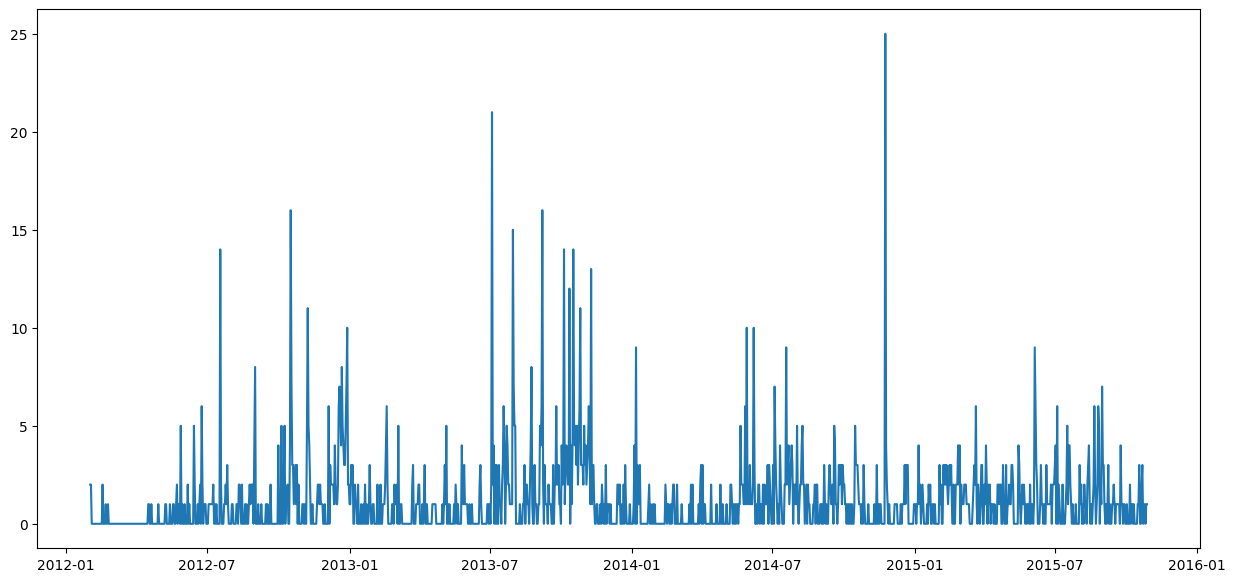

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.plot(fecha_serie, counts_serie, "-")


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8cc76430-fb00-4fa8-b3da-a768d70c6843' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>